In [2]:
import scipy.io
import numpy as np
from scipy.signal import find_peaks_cwt
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
mat = scipy.io.loadmat('EyeBlinks/2Blink5Sec.mat')['Baseline_Segment_04']

In [4]:
eyeblink_channel_1 = mat[1,:]
eyeblink_channel_2 = mat[2,:]

In [7]:
print(eyeblink_channel_1)
indexes = find_peaks_cwt(eyeblink_channel_1, np.arange(1,40),min_length=5)
peaks = eyeblink_channel_1[indexes]
max_peak = peaks.max()
# print peaks
two_peaks = np.sort(peaks)[::-1][:2]
print(two_peaks)
print(np.where(eyeblink_channel_1 == two_peaks[0])[0][0])
print(np.where(eyeblink_channel_1 == two_peaks[1])[0][0])

[  5.15444088   7.17316294   9.45338535 ...,  11.15125084   9.68928623
   7.9854579 ]
[ 99.95415497  91.72970581]
806
756


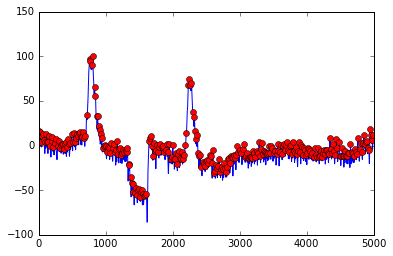

In [8]:
# input = np.array([ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1.1,  1. ,  0.8,  0.9,
#     1. ,  1.2,  0.9,  1. ,  1. ,  1.1,  1.2,  1. ,  1.5,  1. ,  3. ,
#     2. ,  5. ,  3. ,  2. ,  1. ,  1. ,  1. ,  0.9,  1. ,  1. ,  3. ,
#     2.6,  4. ,  3. ,  3.2,  2. ,  1. ,  1. ,  1. ,  1. ,  1. ])
input = eyeblink_channel_1
signal = (input > np.roll(input,1)) & (input > np.roll(input,-1))
plt.plot(input)
plt.plot(signal.nonzero()[0], input[signal], 'ro')
plt.show()


In [10]:
print (eyeblink_channel_1.std())
print (eyeblink_channel_1.mean())
print (eyeblink_channel_1.var())
max_value = eyeblink_channel_1.max()
maxTermIndex = np.where(eyeblink_channel_1 == eyeblink_channel_1.max())
print (maxTermIndex)
peak = []
for i in range(-2,3,1):
    peak.append(eyeblink_channel_1[maxTermIndex[0][0]+i])
print (peak)
print ([i for i in eyeblink_channel_1 if i>(95.00)])

22.6153
-7.67182
511.451
(array([805]),)
[98.800682, 100.16802, 100.58112, 99.954155, 98.334801]
[95.558289, 96.317108, 96.700058, 96.710129, 96.404922, 95.887253, 95.28566, 96.687233, 98.800682, 100.16802, 100.58112, 99.954155, 98.334801, 95.894539]


In [ ]:
possiblePeaks = []
peak_temp = []
list_of_index_to_be_deleted = []
eyeblink_channel_1 = list(eyeblink_channel_1)
for i in eyeblink_channel_1:
    if eyeblink_channel_1.index(i) <= (len(eyeblink_channel_1)-3):
        if i > eyeblink_channel_1[eyeblink_channel_1.index(i)+1]:
            for j in range(-2,3,1):
                peak_temp.append(eyeblink_channel_1[eyeblink_channel_1.index(i)+j])
                list_of_index_to_be_deleted.append(eyeblink_channel_1.index(i)+j)
            eyeblink_channel_1 = eyeblink_channel_1[:eyeblink_channel_1 .index(i)-2] + eyeblink_channel_1[eyeblink_channel_1.index(i)+2:] 
            print ("pt: ")
            print (peak_temp)
            possiblePeaks.append(peak_temp)
            peak_temp = []
            print ("PP:")
            print (possiblePeaks)
    print(len(eyeblink_channel_1))
print (possiblePeaks)
        

In [ ]:
eyeblink_channel_1 = list(eyeblink_channel_1)
for i in eyeblink_channel_1:
    eyeblink_channel_1 = eyeblink_channel_1[:eyeblink_channel_1.index(i)-2] + eyeblink_channel_1[eyeblink_channel_1.index(i)+2:] 
    print(len(eyeblink_channel_1))

In [ ]:
input = eyeblink_channel_2
signal = (input > np.roll(input,1)) & (input > np.roll(input,-1))
# print input[signal]
plt.plot(input)
plt.plot(signal.nonzero()[0], input[signal], 'ro')
plt.show()

In [ ]:
print (eyeblink_channel_2.std())
print (eyeblink_channel_2.mean())
print (eyeblink_channel_2.var())
max_value = eyeblink_channel_2.max()
maxTermIndex = np.where(eyeblink_channel_2 == eyeblink_channel_2.max())
peak_2 = []
for i in range(-2,3,1):
    peak_2.append(eyeblink_channel_2[maxTermIndex[0][0]+i])
print (peak_2)
print ([i for i in eyeblink_channel_2 if i>(30.00)])